# Explainable AI Lab 1

**Ahmed Baari**  
126156004  
6th Semester - G Section

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/city_day.csv')
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


# Exploratory Data Analysis

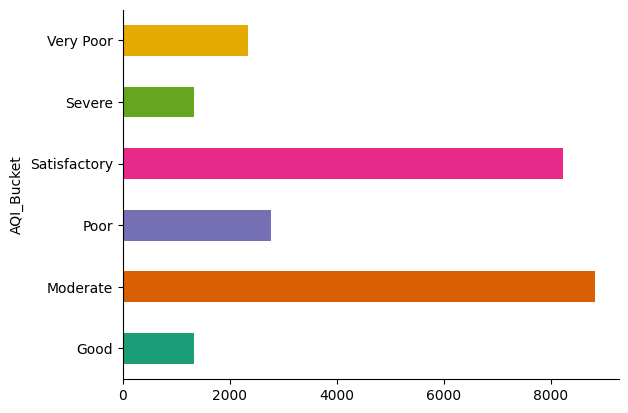

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('AQI_Bucket').size().plot(kind='barh')
# plt.gca().spines[['top', 'right',]].set_visible(False)

In [4]:
df.isna().sum()

,0
City,0
Date,0
PM2.5,4598
PM10,11140
NO,3582
NO2,3585
NOx,4185
NH3,10328
CO,2059
SO2,3854


In [5]:
df.City.unique()

array(['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru',
       'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore',
       'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad',
       'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
       'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram',
       'Visakhapatnam'], dtype=object)

# Data Preprocessing

In [6]:
df = df.dropna(subset='PM2.5')
df.isna().sum()

,0
City,0
Date,0
PM2.5,0
PM10,7301
NO,351
NO2,377
NOx,1470
NH3,6644
CO,370
SO2,505


### We have a huge number of missing values

**Checking for correlation before dropping/imputation**

<Axes: >

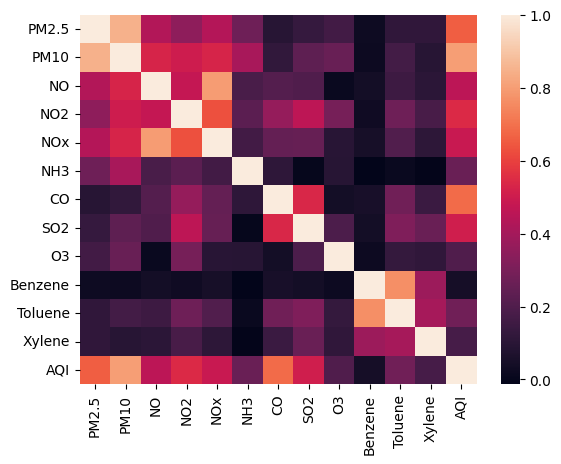

In [ ]:
# Select only numerical features for correlation analysis
numerical_features = df.select_dtypes(include=np.number).columns
df_corr = df[numerical_features].iloc[2:].corr()

sns.heatmap(df_corr)

`Xylene` has too many values missing, so I am going to drop it

In [8]:
df = df.drop(columns=['Xylene'])  # 15273 missing
df.isna().sum()

,0
City,0
Date,0
PM2.5,0
PM10,7301
NO,351
NO2,377
NOx,1470
NH3,6644
CO,370
SO2,505


### Performing Mean Median Imputation

In [9]:
df['PM10'].fillna(df['PM10'].mean(), inplace=True) # Impute with mean

<ipython-input-9-b3fc7612b412>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PM10'].fillna(df['PM10'].mean(), inplace=True) # Impute with mean


In [10]:
df['NO'].fillna(df['NO'].median(), inplace=True) # Impute with median

<ipython-input-10-df1fd581e5c2>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['NO'].fillna(df['NO'].median(), inplace=True) # Impute with median


### Performing Forward Fill

In [11]:
df['NO2'].fillna(method='ffill', inplace=True) # Forward fill

<ipython-input-11-13f2c2ecc19a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['NO2'].fillna(method='ffill', inplace=True) # Forward fill
<ipython-input-11-13f2c2ecc19a>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['NO2'].fillna(method='ffill', inplace=True) # Forward fill


In [12]:
df.isna().sum()

,0
City,0
Date,0
PM2.5,0
PM10,0
NO,0
NO2,0
NOx,1470
NH3,6644
CO,370
SO2,505


### For the rest of the columns, I'll use KNN to impute the missing values

In [13]:
from sklearn.impute import KNNImputer
import pandas as pd

# Select only numerical features for imputation
numerical_features = df.select_dtypes(include=np.number).columns
df_numerical = df[numerical_features]

# Apply KNNImputer to numerical features only
imputer = KNNImputer(n_neighbors=5)
df_filled_numerical = pd.DataFrame(imputer.fit_transform(df_numerical), columns=df_numerical.columns, index=df_numerical.index)

# Concatenate the imputed numerical features with the original non-numerical features
df_filled = pd.concat([df_filled_numerical, df.drop(columns=numerical_features)], axis=1)

In [14]:
df_filled.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,City,Date,AQI_Bucket
27,73.24,117.560919,5.72,21.11,25.84,72.172,5.72,36.52,62.42,0.03,0.01,164.6,Ahmedabad,2015-01-28,NaN
28,83.13,117.560919,6.93,28.71,33.72,34.160,6.93,49.52,59.76,0.02,0.00,209.0,Ahmedabad,2015-01-29,Poor
29,79.84,117.560919,13.85,28.68,41.08,23.306,13.85,48.49,97.07,0.04,0.00,328.0,Ahmedabad,2015-01-30,Very Poor
30,94.52,117.560919,24.39,32.66,52.61,15.562,24.39,67.39,111.33,0.24,0.01,514.0,Ahmedabad,2015-01-31,Severe
31,135.99,117.560919,43.48,42.08,84.57,16.254,43.48,75.23,102.70,0.40,0.04,782.0,Ahmedabad,2015-02-01,Severe


In [15]:
df_filled.isna().sum()

,0
PM2.5,0
PM10,0
NO,0
NO2,0
NOx,0
NH3,0
CO,0
SO2,0
O3,0
Benzene,0


### Finally, for `AQI_Bucket`, I'll one-hot-encode the values

Dropping City and Date as we are not working with time series data

In [16]:
df = df_filled
df.drop(columns=['City', 'Date'], inplace=True)

In [17]:
df['AQI_Bucket'].unique()

array([nan, 'Poor', 'Very Poor', 'Severe', 'Moderate', 'Satisfactory',
       'Good'], dtype=object)

In [18]:
aqi_mapping = {
    'Good': 1,
    'Satisfactory': 2,
    'Moderate': 3,
    'Poor': 4,
    'Very Poor': 5,
    'Severe': 6,
}

df['AQI_Encoded'] = df['AQI_Bucket'].map(aqi_mapping).fillna(3)


df[['AQI_Bucket', 'AQI_Encoded']].head()

,AQI_Bucket,AQI_Encoded
27,NaN,3.0
28,Poor,4.0
29,Very Poor,5.0
30,Severe,6.0
31,Severe,6.0


In [19]:
df.drop(columns=['AQI_Bucket'], inplace=True)

In [20]:
df.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Encoded
27,73.24,117.560919,5.72,21.11,25.84,72.172,5.72,36.52,62.42,0.03,0.01,164.6,3.0
28,83.13,117.560919,6.93,28.71,33.72,34.160,6.93,49.52,59.76,0.02,0.00,209.0,4.0
29,79.84,117.560919,13.85,28.68,41.08,23.306,13.85,48.49,97.07,0.04,0.00,328.0,5.0
30,94.52,117.560919,24.39,32.66,52.61,15.562,24.39,67.39,111.33,0.24,0.01,514.0,6.0
31,135.99,117.560919,43.48,42.08,84.57,16.254,43.48,75.23,102.70,0.40,0.04,782.0,6.0


## The Pre-processed DF.

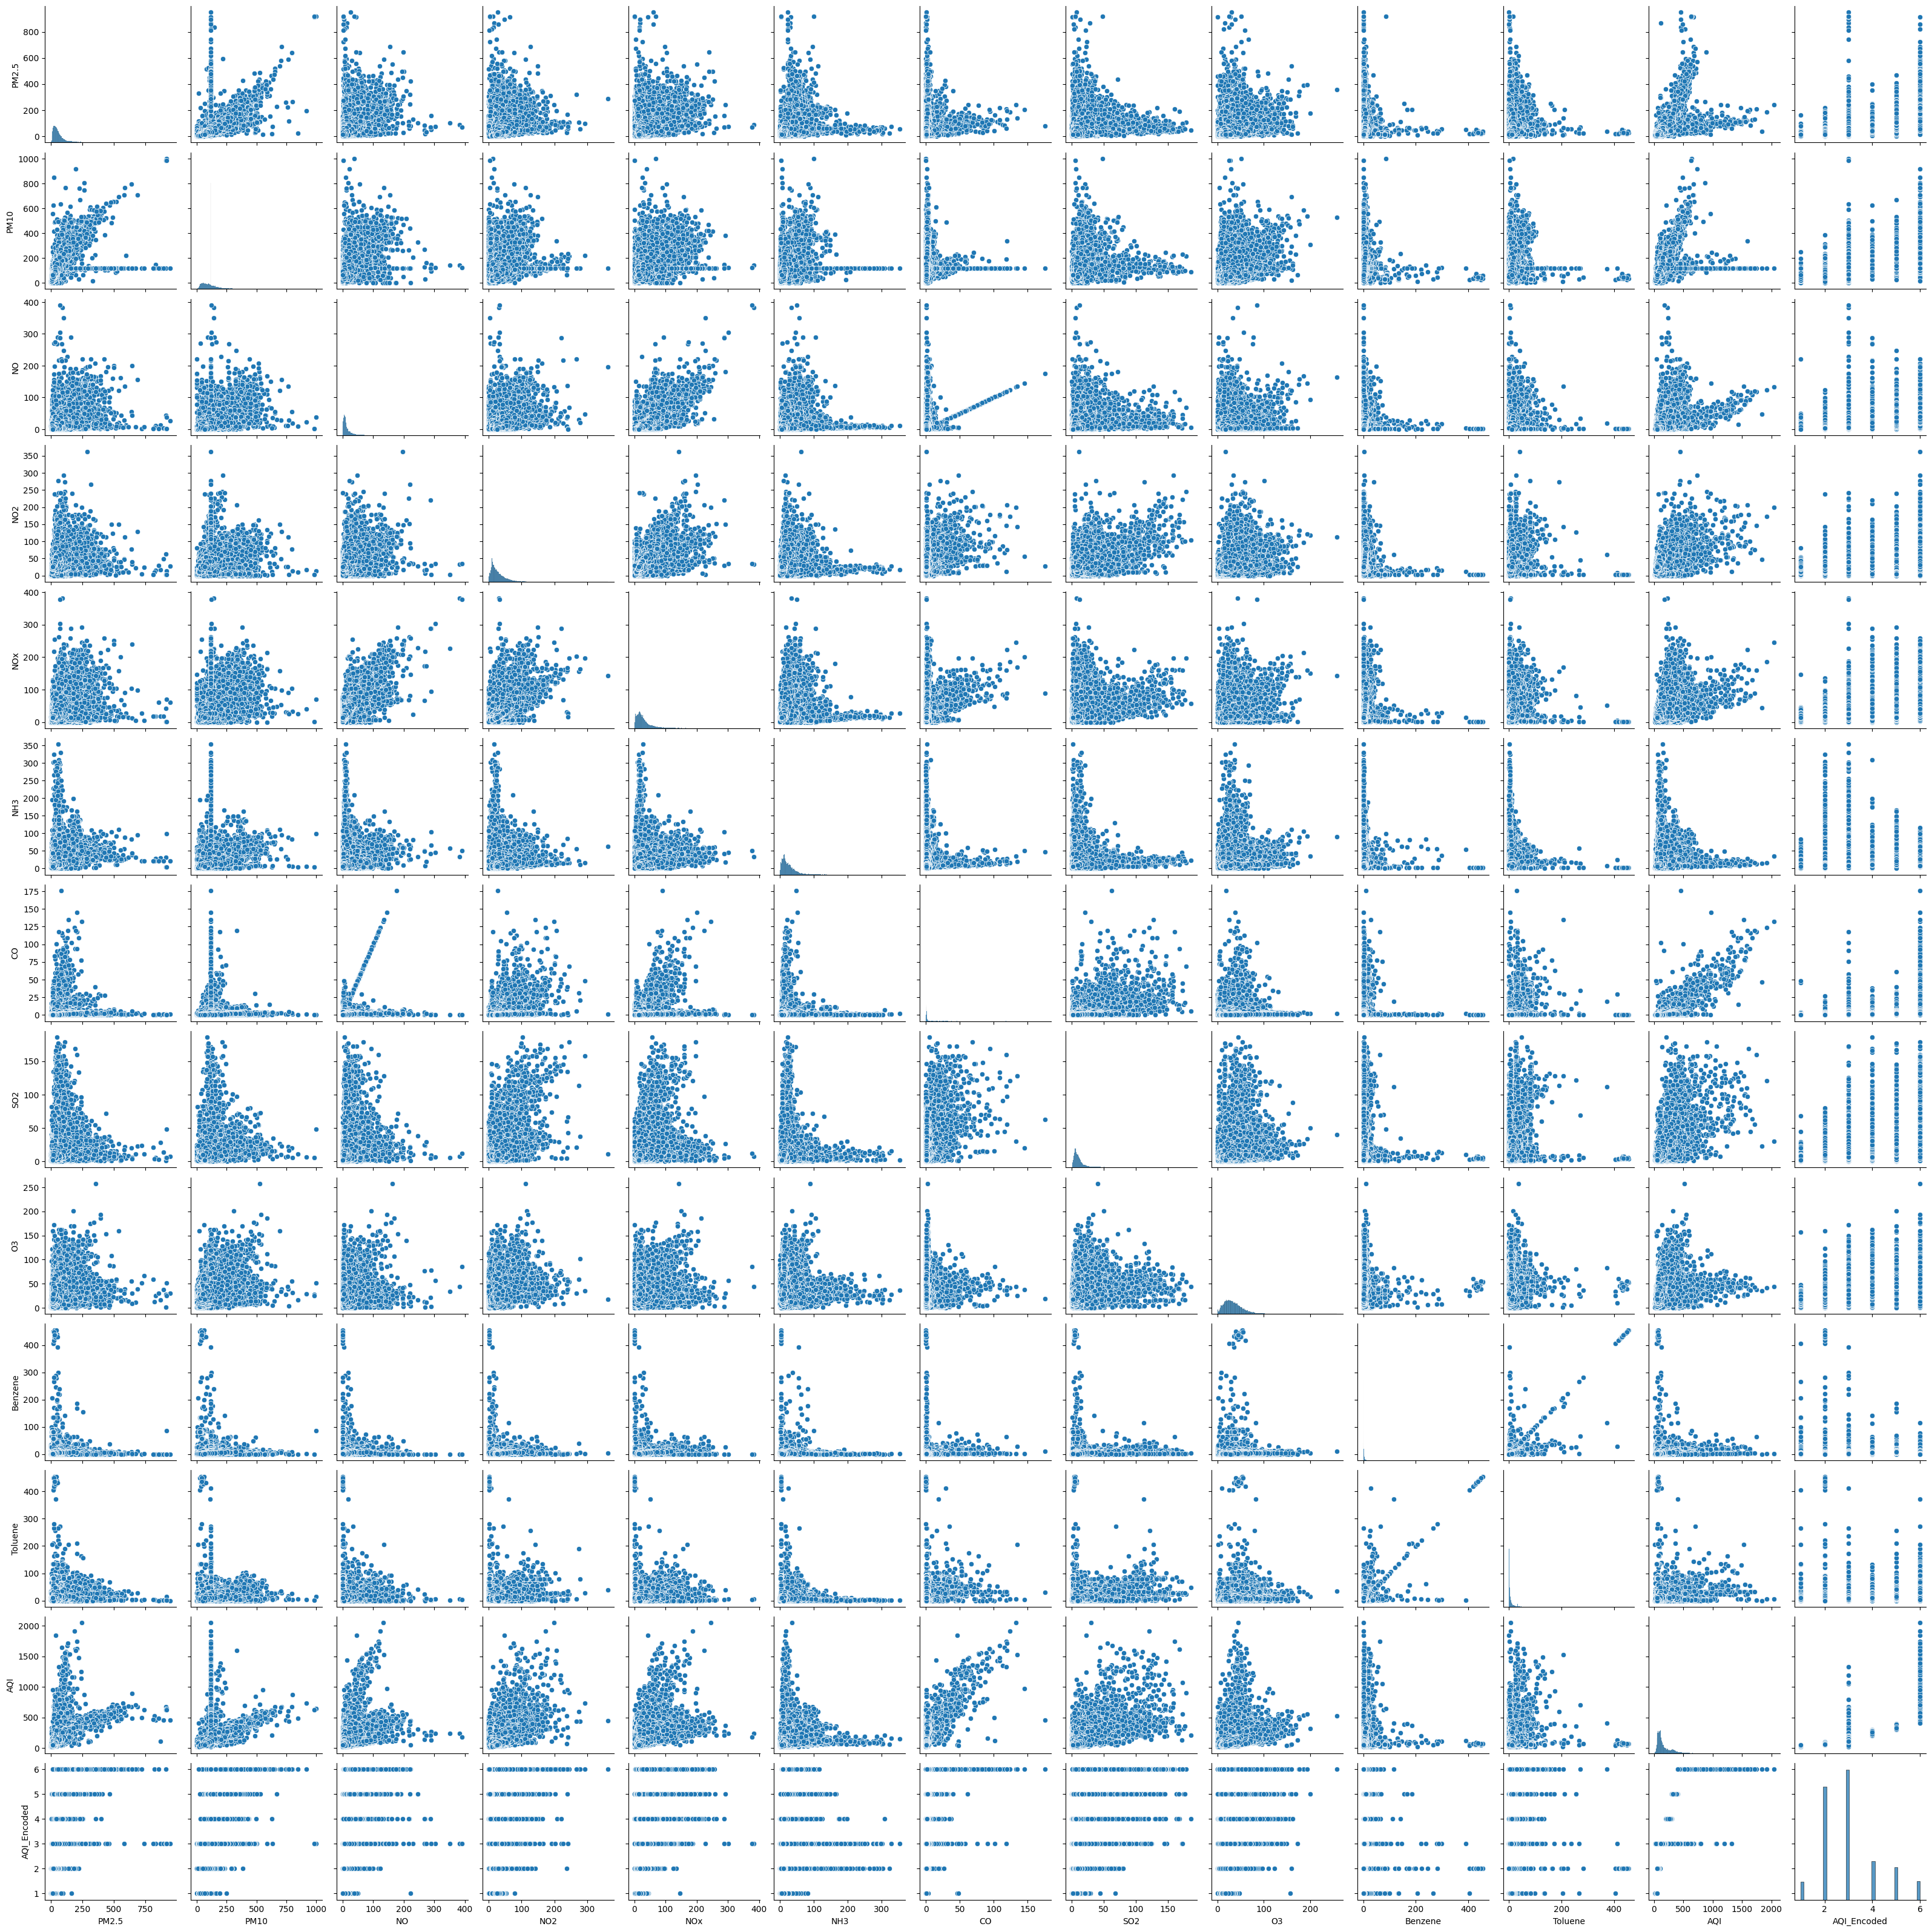

In [21]:
sns.pairplot(df)

# Model Prediction Before Noise+Drift

## Linear Regression

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [23]:
X = df[['PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'AQI', 'AQI_Encoded']]
y = df['PM2.5']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adjust test_size and random_state

In [24]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [25]:
y_pred = model.predict(X_test)

In [26]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 1292.281182390992
R-squared: 0.6983542879634128


An R-squared of 0.698 suggests that approximately 69.8% of the variance in PM2.5 is explained by the model.
This is generally considered a moderate to good R-squared value, indicating that the model is capturing a significant portion of the variability in PM2.5.

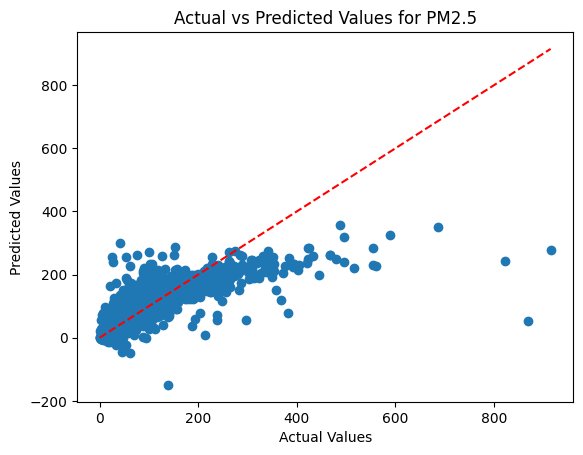

In [28]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values for PM2.5")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Add a diagonal line
plt.show()

## Neural Network

In [29]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [31]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [42]:
# neural network model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)  # Output layer with a single neuron for regression
])

# Compile
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [43]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
499/499 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 5830.0474 - mae: 50.1713 - val_loss: 1493.8789 - val_mae: 20.9095
Epoch 2/100
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1243.1437 - mae: 19.9882 - val_loss: 1304.2124 - val_mae: 18.6977
Epoch 3/100
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1066.4196 - mae: 18.0942 - val_loss: 1211.3456 - val_mae: 17.8645
Epoch 4/100
499/499 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1058.5629 - mae: 17.8312 - val_loss: 1139.9469 - val_mae: 16.9630
Epoch 5/100
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1017.3702 - mae: 17.5134 - val_loss: 1098.8009 - val_mae: 16.4192
Epoch 6/100
499/499 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 882.9224 - mae: 16.4004 - val_loss: 1050.6614 - val_mae: 15.9002
Epoch 7/100
499/499 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 835.1471 - mae: 15.7917 - val_loss: 1029.1388 - val_mae: 15.5666
Epoch 8/100
499/499 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 835.4501 - mae: 15.4338 - val_loss: 987.1773 - val_m

In [44]:
# Evaluate
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 13.021218299865723


In [45]:
# Predict
y_pred = model.predict(X_test)

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


# Adding Noise and Drift

## Viewing CO and PM10 Before Editing

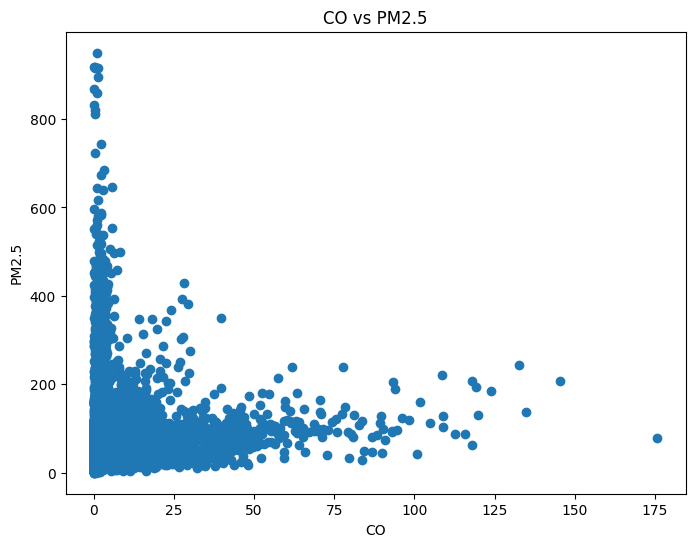

In [46]:
# Plot CO vs PM2.5
plt.figure(figsize=(8, 6))
plt.scatter(df['CO'], df['PM2.5'])  # scatter plot
plt.xlabel('CO')
plt.ylabel('PM2.5')
plt.title('CO vs PM2.5')
plt.show()

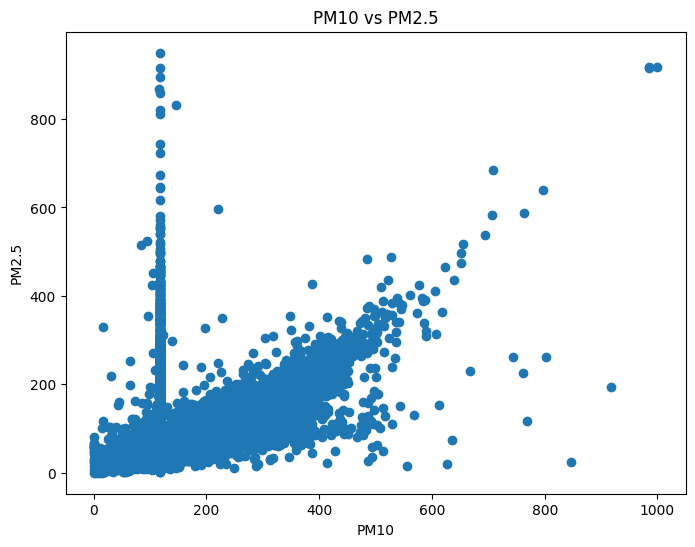

In [47]:
# Plot PM10 vs PM2.5
plt.figure(figsize=(8, 6))
plt.scatter(df['PM10'], df['PM2.5'])  # scatter plot
plt.xlabel('PM10')
plt.ylabel('PM2.5')
plt.title('PM10 vs PM2.5')
plt.show()

## Add Noise + Drift

### Add Noise to CO

In [61]:
noise_scale = 2  # scale of noise
df['CO_noisy'] = df['CO'] + np.random.normal(scale=noise_scale, size=len(df))

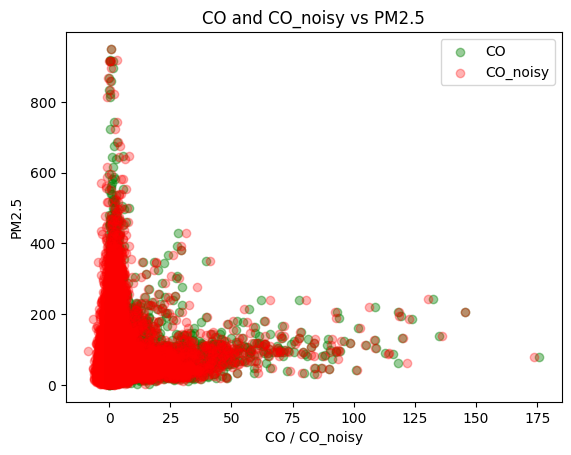

In [62]:
plt.scatter(df['CO'], df['PM2.5'], label='CO', color='green',alpha=0.4)  # before
plt.scatter(df['CO_noisy'], df['PM2.5'], label='CO_noisy', color='red', alpha=0.3)  # after

plt.xlabel('CO / CO_noisy')
plt.ylabel('PM2.5')
plt.title('CO and CO_noisy vs PM2.5')
plt.legend()  # Show legend

plt.show()

### Add drift to PM10

In [63]:
drift_rate = 0.01  # rate of drift
df['PM10_drift'] = df['PM10'] + np.linspace(0, drift_rate * len(df), len(df))

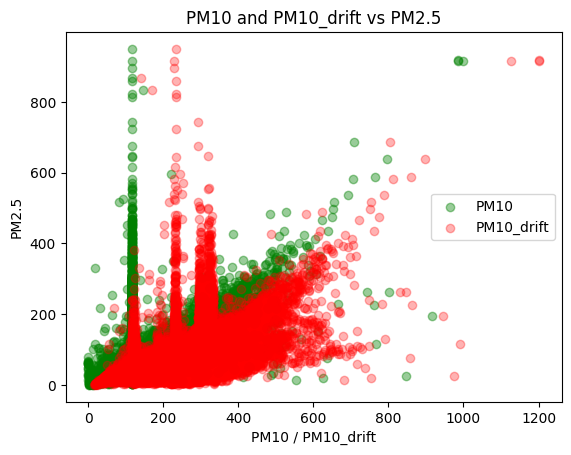

In [65]:
plt.scatter(df['PM10'], df['PM2.5'], label='PM10', color='green',alpha=0.4)  # Plot PM10 in green
plt.scatter(df['PM10_drift'], df['PM2.5'], label='PM10_drift', color='red', alpha=0.3)  # Plot PM10_drift in red

plt.xlabel('PM10 / PM10_drift')
plt.ylabel('PM2.5')
plt.title('PM10 and PM10_drift vs PM2.5')
plt.legend()

plt.show()

Dropping old values

In [66]:
df.drop(columns=['PM10', 'CO'],axis=1, inplace=True)

# Model Prediction After Noise+Drift

## Linear Regression

In [67]:
X = df[['PM10_drift', 'NO', 'NO2', 'NOx', 'NH3', 'CO_noisy', 'SO2', 'O3', 'Benzene', 'Toluene', 'AQI', 'AQI_Encoded']]
y = df['PM2.5']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [69]:
y_pred = model.predict(X_test)

In [70]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 1365.0710559372603
R-squared: 0.68136359465757


approximately 68.1% of the variance in PM2.5 is explained by the model, which is lower than before noise+drift


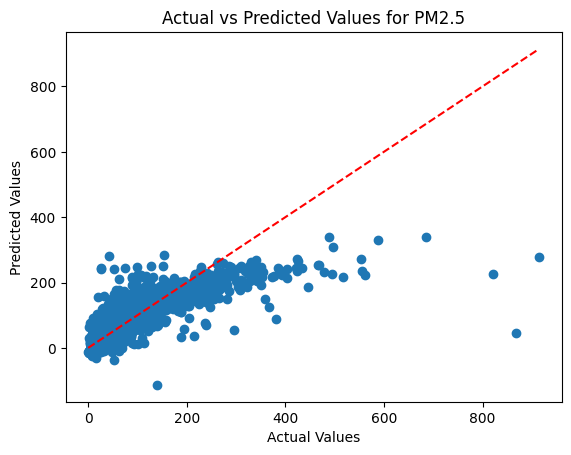

In [71]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values for PM2.5")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Add a diagonal line
plt.show()

## Neural Network

In [72]:
# Scale
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [73]:
# neural network
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)  # Output layer with a single neuron for regression
])

# Compile
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [74]:
# Train
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
499/499 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 5612.6616 - mae: 49.0958 - val_loss: 1479.4666 - val_mae: 20.9085
Epoch 2/100
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1229.6376 - mae: 20.3551 - val_loss: 1358.4994 - val_mae: 19.9953
Epoch 3/100
499/499 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1283.8910 - mae: 19.9707 - val_loss: 1284.7018 - val_mae: 18.9455
Epoch 4/100
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1017.1594 - mae: 18.5557 - val_loss: 1220.7040 - val_mae: 18.2694
Epoch 5/100
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 990.5602 - mae: 17.8903 - val_loss: 1145.3785 - val_mae: 17.3262
Epoch 6/100
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1061.8679 - mae: 17.4299 - val_loss: 1111.7537 - val_mae: 17.0931
Epoch 7/100
499/499 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 1000.9667 - mae: 16.8187 - val_loss: 1057.6294 - val_mae: 16.2315
Epoch 8/100
499/499 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 1064.9071 - mae: 16.5007 - val_loss: 1018.0069 - va

In [75]:
# Evaluate
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 13.590654373168945


# Conclusion

| Type | Model | Loss |
| ---- | ---- | ---- |
| Before | Linear Regression | 1292.28 |
| Before | Neural Network | 412.38 |
| After | Linear Regression | 1365.07 |
| After | Neural Network | 582.02 |

So we can see that the loss has significantly increased after adding noise and drift to the dataset